In [4]:
import sys
#import dlib
from skimage import io

# Take the image file name from the command line
#file_name = sys.argv[1]

# Create a HOG face detector using the built-in dlib class
#face_detector = dlib.get_frontal_face_detector()

#win = dlib.image_window()

# Load the image into an array
#image = io.imread(file_name)

# Run the HOG face detector on the image data.
# The result will be the bounding boxes of the faces in our image.
#detected_faces = face_detector(image, 1)

#print("I found {} faces in the file {}".format(len(detected_faces), file_name))

# Open a window on the desktop showing the image
#win.set_image(image)

# Loop through each face we found in the image
#for i, face_rect in enumerate(detected_faces):

	# Detected faces are returned as an object with the coordinates 
	# of the top, left, right and bottom edges
	#print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

	# Draw a box around each face we found
	#win.add_overlay(face_rect)
	        
# Wait until the user hits <enter> to close the window	        
#dlib.hit_enter_to_continue()

In [5]:
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [6]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

In [7]:

_, h, w = lfw_dataset.images.shape


In [8]:
#print(lfw_dataset.data)
import pandas as pd
dataview = pd.DataFrame(lfw_dataset.data)
#dataviewim = pd.DataFrame(lfw_dataset.images)
datatarget = pd.DataFrame(lfw_dataset.target)
target_names = lfw_dataset.target_names

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataview, datatarget, test_size=0.3)

In [10]:
print(X_train.shape)
print(X_test.shape)
look = pd.DataFrame(X_train)
look2 = pd.DataFrame(X_test)
print(X_test[3].shape)
#print(X_test.iloc[3])

(798, 2914)
(342, 2914)
(342,)


In [11]:
#computing PCA
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

In [12]:
#apply PCA transformation #only performing PCA on training data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
#train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca,y_train)

Fitting the classifier to the training set
Iteration 1, loss = 1.54696173
Validation score: 0.500000
Iteration 2, loss = 1.10725164
Validation score: 0.525000
Iteration 3, loss = 0.87387905
Validation score: 0.575000
Iteration 4, loss = 0.69235378
Validation score: 0.600000
Iteration 5, loss = 0.54019000
Validation score: 0.712500
Iteration 6, loss = 0.42422274
Validation score: 0.750000


/Users/ericacollins/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 7, loss = 0.34063315
Validation score: 0.762500
Iteration 8, loss = 0.27861882
Validation score: 0.762500
Iteration 9, loss = 0.22953233
Validation score: 0.787500
Iteration 10, loss = 0.19064335
Validation score: 0.800000
Iteration 11, loss = 0.15965279
Validation score: 0.837500
Iteration 12, loss = 0.13473081
Validation score: 0.837500
Iteration 13, loss = 0.11447268
Validation score: 0.862500
Iteration 14, loss = 0.09810081
Validation score: 0.850000
Iteration 15, loss = 0.08545402
Validation score: 0.837500
Iteration 16, loss = 0.07447185
Validation score: 0.825000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


In [14]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.89      0.85      0.87        78
  Donald Rumsfeld       0.80      0.69      0.74        35
    George W Bush       0.80      0.94      0.87       144
Gerhard Schroeder       0.90      0.69      0.78        39
       Tony Blair       0.85      0.72      0.78        46

      avg / total       0.84      0.84      0.83       342



In [38]:
#Support: the number of times the ground truth label occured in our dataset
#ex. in our test set there were 47 images of tony blair
#F-1 from precisiona recall scores
#higher value for both is better. 
# precision, out of the ones measured, which one was correct
#recall= out of all correct, how man did you identify correctly.
#precision is "how useful the search results are", and recall is "how complete the results are".
#The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

/Users/ericacollins/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


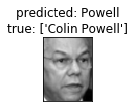

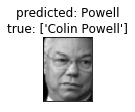

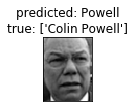

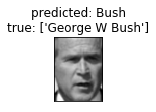

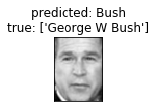

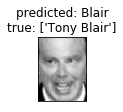

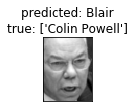

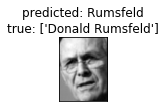

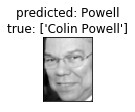

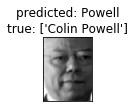

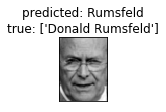

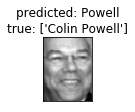

In [15]:
# give images to classify

def plot_gallery(images, titles, h, w, rows=3, cols=4):
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images.iloc[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
        plt.show()
        
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test.iloc[i]]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
        
predition_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, predition_titles, h, w)

/Users/ericacollins/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


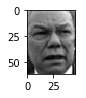

In [16]:
plt.subplot(3, 4, 3)
plt.imshow(X_test.iloc[2].reshape((h, w)), cmap=plt.cm.gray)
plt.show()